# An Analysis of the City of Toronto’s Fire Response between 2011-2019 
## by The City of Toronto Department of Pandas¶

The goal of this project is to create a predictive model capable of determining response time given inputs such as day, time, or location. Exploratory data analysis is iterative, therefore, until our exploratory data analysis is conducted, we will not know exactly which features will be used to implement the model, nor do we know exactly what type of prediction model will be used (e.g., linear regression, logistic regression, or other approaches as suitable). However, an example of our anticipated model can be seen below. 

###  Objectives
The questions we hope to answer with our exploratory data analysis are: 
- Are there temporal trends in factors such as response time, damages, or other relevant factors? 

- Identify the characteristics of fires with extensive damage/casualties. What factors make a fire most/least likely to cause extensive damage/casualties? 

- Analyze and intersect our datasets to find the closest TFS station to each fire. Stations that frequently fail to respond in a timely manner to nearby fires may require more resources from the city. 

- Identify the common fire incidents and causes in each ward. 

- Optional: Is there a correlation between the resources TFS deploys (number of personnel, vehicles, etc.) during incidents and damages (such as casualties/financial)?  

- Optional: Overlay incidents with socio-economic profiles of each neighborhood and analyze whether TFS services are equally and equitably distributed across the city. Are TFS services biased when responding to certain incidents or wards of the city?
- test - Sami

## Setup Notebook

In [8]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Overview

The primary dataset to be used for this project includes information about Toronto’s Fire Incidents (https://open.toronto.ca/dataset/fire-incidents/). This data is a .csv file from the City of Toronto’s open data portal with details of over 17,000 fire incidents between January 1, 2011, to June 30, 2019. The dataset contains 43 columns that describe the geographic location of the fire, the TFS response, impact of the fire, suspected cause, and details of the site (e.g., building condition and presence of sprinklers or alarms). The dataset contains categorical variables, many null values, and string values in many of the columns. Extensive data cleaning and data wrangling as well as feature engineering is needed for this project. Feature engineering techniques such as categorical encoding, datetime extraction, imputation, etc. will be used for this project. The appendix shows the data types and categories of each of the columns in the dataset.  

The rest of the datasets described in this paragraph are secondary datasets that will only be used if time allows. The second dataset is the City of Toronto Wards data which includes spatial boundaries that we can overlay with the fire incident data for visualization purposes (https://open.toronto.ca/dataset/city-wards/). The third dataset is a .GeoJSON file with Toronto Fire station locations (https://open.toronto.ca/dataset/fire-station-locations/). Finally, if time allows, we will use a fourth dataset of Toronto’s neighbourhoods which includes information on variables such as income, population, household type, and education (https://open.toronto.ca/dataset/neighbourhood-profiles/).  

# Import Data
Let's import the training datasets.

In [5]:
fire_data = pd.read_csv('Fire Incidents Data.csv')

In [6]:
fire_data

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,578689,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-24T21:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0
1,578690,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-24T21:29:42,...,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0
2,578691,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0
3,578692,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-25T14:19:25,...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0
4,578693,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17531,596220,49 - Other Storage Area,01 - Normal (no change),1 - No business interruption,0,0,0.0,0.0,NaN,2018-02-24T02:40:00,...,98 - Not applicable: Alarm operated OR presenc...,4 - Interconnected,1 - All persons (at risk of injury) self evacu...,2 - Confined to part of room/area of origin,3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,1 - Fire extinguished prior to arrival,2018-02-24T02:30:33,2018-02-24T02:35:07,0
17532,596221,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-24T17:55:59,2018-02-24T18:02:26,0
17533,596222,91 - Multiple Areas of Origin,NaN,NaN,0,0,25000.0,NaN,NaN,2018-02-24T00:30:22,...,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T00:15:10,2018-02-24T00:25:06,0
17534,596223,64 - Porch or Balcony,01 - Normal (no change),8 - Not applicable (not a business),6,0,100000.0,1.0,NaN,2018-02-24T00:44:00,...,98 - Not applicable: Alarm operated OR presenc...,1 - Battery operated,1 - All persons (at risk of injury) self evacu...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,4 - Flames showing from small area (one storey...,2018-02-24T00:34:12,2018-02-24T00:38:47,0


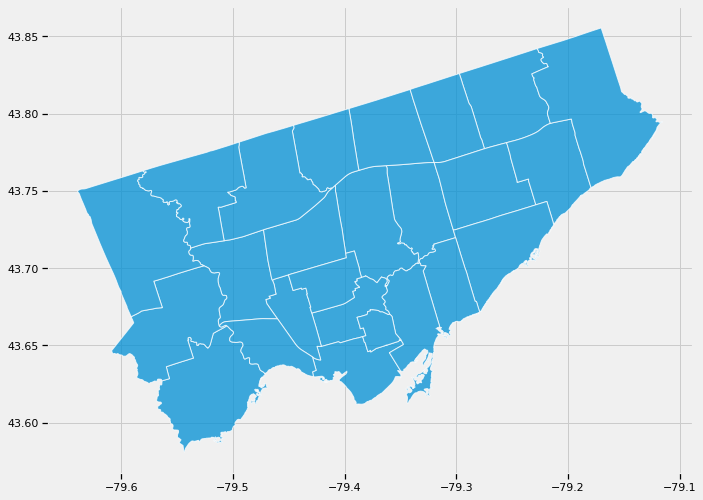

In [14]:
# Write your code here.
ward = gpd.read_file('25-ward-model-december-2018-wgs84-latitude-longitude') #importing shapefile

# View GeoDataFrame
ward.head()
ward.plot(figsize=(15, 8), edgecolor='w', alpha=0.75);